# Simulation of 1D Ising Model

- Preliminaries. 

    In this simulation the initial configuration is at T = ${\infty}$, such that all the spins assume random values in {-1,1}. The equilibration of the system is necessary to bring the 1D Ising Model in a configuration suited for the initial temperature T = 2.0. The MC steps chosen for the equilibration are 10 thousand. 
    
    After the equilibration it has been measured $U(T)/N$, $C(T)/N$, $\chi(T)/N$ (with no external field), $M(T,h=0.02)/N$ and their uncertainties with the temperature deacresed with a step of 0.1 from T = 2.0 to T = 0.5.
    
    In the following are assumed units such that $\mu_B=1$ and $k_B=1$.

1. Internal energy per particle as a function of temperature.

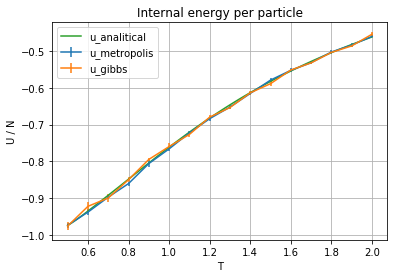

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

x, f, error = np.loadtxt("eneVStemp.metro", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(x,f,yerr=error, label = 'u_metropolis')

y, g, errorg = np.loadtxt("eneVStemp.gibbs", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(y,g,yerr=errorg, label = 'u_gibbs')

plt.title('Internal energy per particle')
plt.plot(T, e, label = 'u_analitical')

plt.xlabel('T')
plt.ylabel('U / N')
plt.grid('true')
plt.legend()

plt.show()

2. Heat Capacity per particle as a function of temperature.

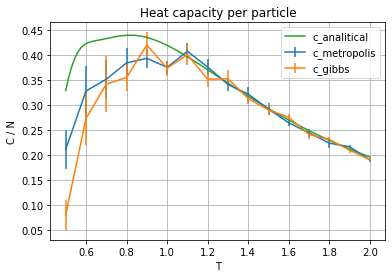

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

x, f, error = np.loadtxt("heatVStemp.metro", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(x,f,yerr=error, label = 'c_metropolis')

y, g, errorg = np.loadtxt("heatVStemp.gibbs", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(y,g,yerr=errorg, label = 'c_gibbs')

plt.plot(T, heat, label = 'c_analitical')
plt.title('Heat capacity per particle')

plt.xlabel('T')
plt.ylabel('C / N')
plt.grid('true')
plt.legend()

plt.show()

3. Magnetization per particle as a function of temperature with h = 0.02.

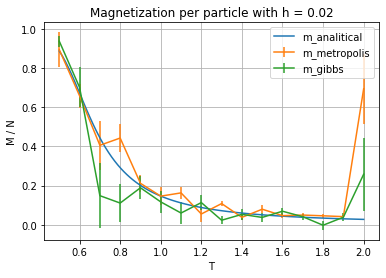

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.plot(T, M, label = 'm_analitical')
plt.title('Magnetization per particle with h = 0.02')
plt.xlabel('T')
plt.ylabel('M / N')

x, f, error = np.loadtxt("magVStemp.metro", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(x,f,yerr=error, label = 'm_metropolis')

y, g, errorg = np.loadtxt("magVStemp.gibbs", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(y,g,yerr=errorg, label = 'm_gibbs')

plt.grid('true')
plt.legend()

plt.show()

4. Susceptibility per particle as a function of temperature.

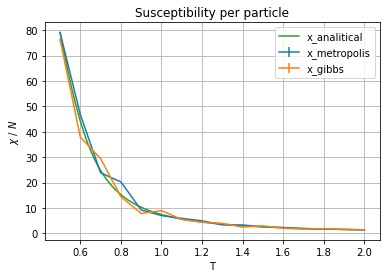

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)


x, f, error = np.loadtxt("chiVStemp.metro", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(x,f,yerr=error, label = 'x_metropolis')

y, g, errorg = np.loadtxt("chiVStemp.gibbs", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(y,g,yerr=errorg, label = 'x_gibbs')

plt.plot(T, X, label = 'x_analitical')
plt.title('Susceptibility per particle')

plt.xlabel('T')
plt.ylabel('$\chi$ / $N$')
plt.grid('true')
plt.legend()

plt.show()